In [102]:
# load and modify the data 

import matplotlib.pyplot as plt
import ast
import re

name = "0010"

file_name = f"gyro_data/gyro_data_{name}.txt"

# Check each entry for the correct number of values
def check_data(data, expected_length=19):
    incorrect_entries = []
    for index, entry in enumerate(data):
        if len(entry) != expected_length:
            print(f"Entry at index {index} has {len(entry)} values instead of {expected_length}.")
            incorrect_entries.append(index)
    
    # Remove entries with incorrect number of values
    for index in sorted(incorrect_entries, reverse=True):
        del data[index]
    
    return data


with open(file_name, "r") as file:
    serial_data = file.read()

# convert to integer
serial_data = ast.literal_eval(serial_data)

for data in serial_data:
    print(data)

# Define a regular expression pattern to match valid strings
valid_pattern = re.compile(r'^-?\d+$')

# Filter out entries with invalid strings or empty strings
filtered_data = [row for row in serial_data if all(valid_pattern.match(value.strip()) for value in row) and all(value.strip() for value in row)]

cleaned_data = check_data(filtered_data)

serial_data = [[int(value.strip()) for value in row] for row in cleaned_data]     

# clean serial data for truncated tupels


# transpose the data 
# [accX, ma_accX, dev_accX, accY, ... , dev_accZ, gyrX, ma_gyrX, dev_gyrX, gyrY, ... , dev_gyrZ, acc_vec]
transposed_data = list(map(list, zip(*serial_data)))

for data in transposed_data:
    print(data)

['-1\x13-15440', ' -3088', ' 3088', ' -448', ' -89', ' 89', ' -2440', ' -488', ' 488', ' -228', ' -45', ' 45', ' 274', ' 54', ' -54', ' -354', ' -70', ' 70', ' 3127']
['-15112', ' -6110', ' 6110', ' -720', ' -233', ' 233', ' -2180', ' -924', ' 924', ' -201', ' -85', ' 85', ' 298', ' 114', ' -114', ' -397', ' -150', ' 150', ' 3056']
['-15064', ' -9123', ' 9123', ' -520', ' -337', ' 337', ' -2252', ' -1374', ' 1374', ' -214', ' -128', ' 128', ' 285', ' 171', ' -171', ' -424', ' -235', ' 235', ' 3049']
['-15140', ' -12151', ' 12151', ' -644', ' -466', ' 466', ' -2188', ' -1812', ' 1812', ' -266', ' -181', ' 181', ' 192', ' 209', ' -209', ' -431', ' -321', ' 321', ' 3062']
['-15208', ' -15192', ' 12104', ' -500', ' -566', ' 477', ' -2196', ' -2251', ' 1763', ' -254', ' -232', ' 187', ' 214', ' 252', ' -198', ' -421', ' -405', ' 335', ' 3074']
['-15148', ' -15134', ' 9024', ' -612', ' -599', ' 366', ' -2196', ' -2202', ' 1278', ' -259', ' -238', ' 153', ' 195', ' 236', ' -122', ' -414', ' -

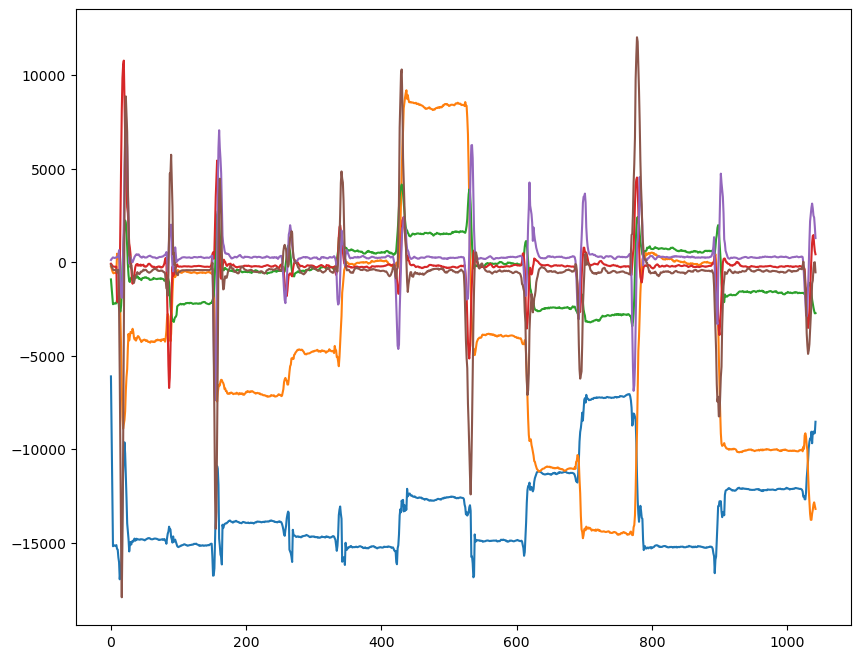

In [103]:
# plot the data 

fig, ax = plt.subplots(figsize=(10,8))

selection_raw = [0, 3, 6, 9, 12, 15]
selection_averages = [1, 4, 7, 10, 13, 16]
selection_deviation = [2, 5, 8, 11, 14, 17]

x = [i for i in range(len(transposed_data[0]))]

for i in selection_averages:
    plt.plot(x, transposed_data[i])

# plt.plot(x, transposed_data[18])

plt.show()
